<a href="https://colab.research.google.com/github/mqquiroz/HUCLAM/blob/main/Vertedero2_HUCLAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Constantes
g     = 9.81
rho   = 1000
gamma = rho*g
nu    = 1e-6

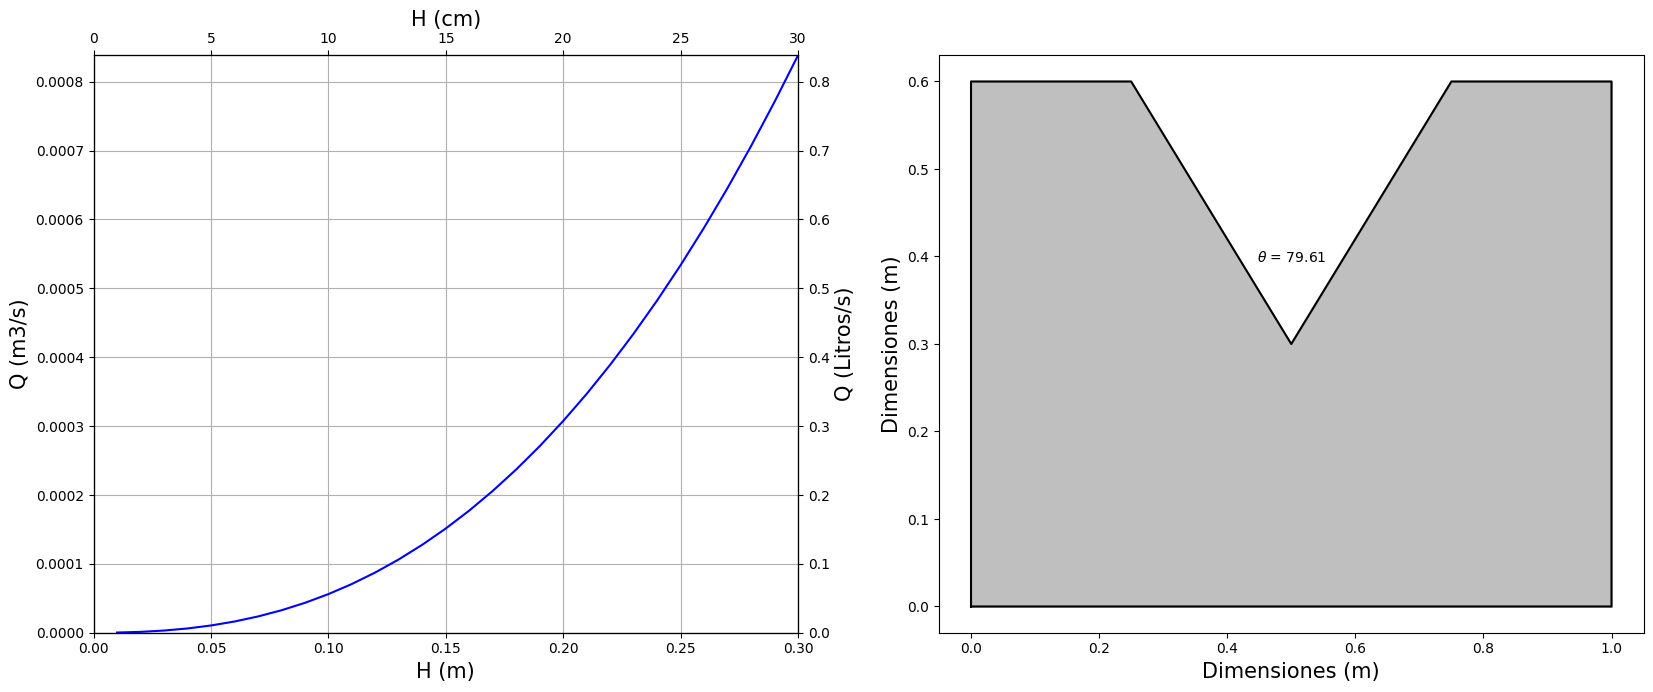

In [62]:
#Cálculo de Vertedero de Pared Delgada.
#Vertedero de Perfil Triangular
#Ecuación de descarga: Q = m*tan(theta/2)*sqrt(2g)*H^(5/2)
#El coeficiente del gasto es estimado utilizando la reación dada por Hegly (1921)
# m = (0.31 + 0.002/H)

#INPUTS
LT = 0.6  #(m)
A  = 0.5 #(m)
LV = 0.3  #(m)
b  = 1.0  #(m)

#Desarrollo
theta = 2*np.arctan((A/2)/(LT-LV))# (rad) *(180/np.pi)

#---------------------------------------------------------
Hmin  = 0.01 #(m)
Hmax  = LT-LV  #(m)
H = np.arange(Hmin,Hmax+Hmin,Hmin)
m = 0.31 + (0.002/H)

Q = m*np.tan((theta/2)*np.pi/180)*np.sqrt(2*g)*(H**(5/2))
Qmax = np.max(Q)

fig, ax = plt.subplots(1,2,figsize=(20,7.5))

ax1 = ax[0].twinx()
ax1.set_ylim(0,Qmax*1000)# np.max(Q)*1000)
ax1.set_ylabel('Q (Litros/s)',fontsize=15)

ax2 = ax[0].twiny()
ax2.set_xlim(0,Hmax*100)
ax2.set_xlabel('H (cm)',fontsize=15)

ax[0].plot(H,Q,'b')
ax[0].set_xlim(0,Hmax)
ax[0].set_ylim(0,Qmax)#np.max(Q))
ax[0].set_xlabel('H (m)',fontsize=15)
ax[0].set_ylabel('Q (m3/s)',fontsize=15)
ax[0].grid()

#Dibujo
#x2 = (LT-LV)*np.tan((theta/2)*np.pi/180)
#x = 2*x2

delta = (b-(x))/2
delta = (b-A)/2

x_coords = [0,b, b,b-delta,b-delta-(A/2),delta, 0,0]
y_coords = [0,0,LT,     LT,           LV,   LT,LT,0]

ax[1].plot(x_coords,y_coords,'k')
ax[1].fill_between(x_coords,y_coords, color='grey', alpha=0.5)
ax[1].set_xlabel('Dimensiones (m)',fontsize=15)
ax[1].set_ylabel('Dimensiones (m)',fontsize=15)
ax[1].text(b/2,LV+(0.15*LT),'$\\theta$ = '+str(np.round(theta*(180/np.pi),2)),horizontalalignment='center',verticalalignment='bottom')
plt.show()